# First order necessary conditions

## Background: Taylor's theorem

Let $k \ge 1$ be an integer and let the function $f : \mathbb{R} \rightarrow \mathbb{R}$ be $k$ times differentiable at the point $a \in \mathbb{R}$. Then there exists a function $h(k) : \mathbb{R} \rightarrow \mathbb{R}$ such that
$$f(x)=f(a)+f'(a)(x-a)+{\frac {f''(a)}{2!}}(x-a)^{2}+\cdots +{\frac {f^{(k)}(a)}{k!}}(x-a)^{k}+h_{k}(x)(x-a)^{k}$$
and
$${\lim _{x\to a}h_{k}(x)=0}$$

This means that as we approach the point $a$, the approximation error $h_{k}(x)(x-a)^{k}$ becomes 0, i.e., we get close to the value of $f(x)$.

Consider the function
$$
f(x) = \dfrac{1}{1+x^2}
$$

its $k$ th order approximations at $a_1=0$ and $a_2=1$ are shown below

derivative k=0:


1/(x**2 + 1)

derivative k=1:


-2*x/(x**2 + 1)**2

derivative k=2:


2*(3*x**2 - 1)/(x**2 + 1)**3

derivative k=3:


-24*x*(x**2 - 1)/(x**2 + 1)**4

derivative k=4:


24*(16*x**4 - 12*x**2*(x**2 + 1) + (x**2 + 1)**2)/(x**2 + 1)**5

derivative k=5:


3840*x**3/(x**2 + 1)**6 - 720*x/(x**2 + 1)**4

derivative k=6:


720*(64*x**6 - 80*x**4*(x**2 + 1) + 24*x**2*(x**2 + 1)**2 - (x**2 + 1)**3)/(x**2 + 1)**7

derivative k=7:


-40320*x*(16*x**6 - 24*x**4*(x**2 + 1) + 10*x**2*(x**2 + 1)**2 - (x**2 + 1)**3)/(x**2 + 1)**8

derivative k=8:


40320*(256*x**8 - 448*x**6*(x**2 + 1) + 240*x**4*(x**2 + 1)**2 - 40*x**2*(x**2 + 1)**3 + (x**2 + 1)**4)/(x**2 + 1)**9

derivative k=9:


185794560*x**9/(x**2 + 1)**10 + 371589120*x**7/(x**2 + 1)**10 - 243855360*x**5/(x**2 + 1)**8 + 58060800*x**3/(x**2 + 1)**7 - 3628800*x/(x**2 + 1)**6

derivative k=10:


3628800*(1024*x**10 - 2304*x**8*(x**2 + 1) + 1792*x**6*(x**2 + 1)**2 - 560*x**4*(x**2 + 1)**3 + 60*x**2*(x**2 + 1)**4 - (x**2 + 1)**5)/(x**2 + 1)**11

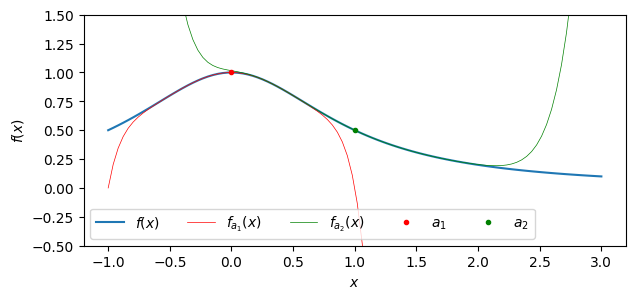

In [7]:
import sympy as sym
from sympy import lambdify, pprint
import matplotlib.pyplot as plt
import numpy as np
import math

x = sym.Symbol('x')
f = 1/(1+x**2)

# plot values
x_plot = np.linspace(-1,3,100)
f_plot = lambdify(x, f, modules=['numpy'])

# parameters
k = 10
a1 = 0
a2 = 1

# function approximation
fa_1 = 0; fa_2 = 0
for i in range(k+1): 
    fk = sym.diff(f, x, i)
    print('derivative k=%i:'%i)
    display(sym.simplify(fk))
    fk_plot = lambdify(x, fk, modules=['numpy'])
    fa_1 += (fk_plot(a1)/math.factorial(i)) * ((x_plot - a1) ** i)
    fa_2 += (fk_plot(a2)/math.factorial(i)) * ((x_plot - a2) ** i)

# plotting
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(x_plot, f_plot(x_plot),label='$f(x)$')
ax.plot(x_plot,fa_1,'-r',linewidth=0.5,label='$f_{a_1}(x)$')
ax.plot(x_plot,fa_2,'-g',linewidth=0.5,label='$f_{a_2}(x)$')
ax.plot(a1,f_plot(a1),'.r',label='$a_1$')
ax.plot(a2,f_plot(a2),'.g',label='$a_2$')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.set_ylim((-0.5,1.5))
# ax.set_title('taylor series approximation of $f(x)=\dfrac{1}{1+x^2}$')
ax.legend(ncol=5,loc='lower left');
fig.savefig('k%i_approximation.pdf' %(k),format='pdf', dpi=200, bbox_inches='tight')

What can you say about the point $a_1=0$ when looking at the **first** order approximation ($k=1$)?

*It is clearly a stationary point since the slope of the approximation $f^1_{a_1}(x)$ is $0$.*

What can you say about the point $a_1=0$ when looking at the **second** order approximation ($k=2$)?

*It is a maximizer since the quadratic approximation $f^2_{a_1}(x)$ is concaving downwards*